<a href="https://colab.research.google.com/github/pankovakris/hse_course_basic/blob/main/%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82_%22hse_ml_week3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import numpy as np

In [ ]:
df = pd.read_csv('train.csv', header=0, sep=',', quotechar='"')

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df = df.drop('dropoff_datetime', axis=1)

df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

df = df.sort_values(by='pickup_datetime')

In [ ]:
df_train = df[:500_000]
df_test = df[500_000:700_000]

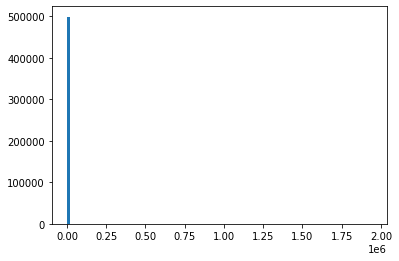

In [ ]:
df_train.trip_duration.hist(bins=100, grid=False, )

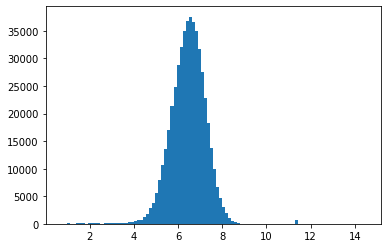

In [ ]:
np.log1p(df_train.trip_duration).hist(bins=100, grid=False, )

In [ ]:
df_train['log_trip_duration'] = np.log1p(df_train.trip_duration)
df_test['log_trip_duration'] = np.log1p(df_test.trip_duration)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

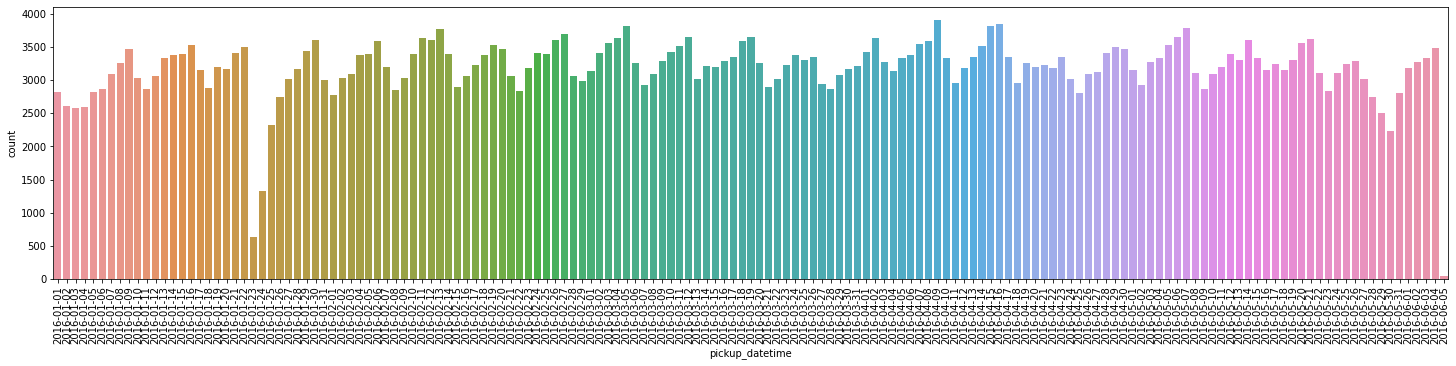

In [ ]:
date_sorted = df_train.pickup_datetime.dt.date.sort_values()

plt.figure(figsize=(25, 5))
date_count_plot = sns.countplot(
  x=date_sorted,
)
date_count_plot.set_xticklabels(date_count_plot.get_xticklabels(), rotation=90);

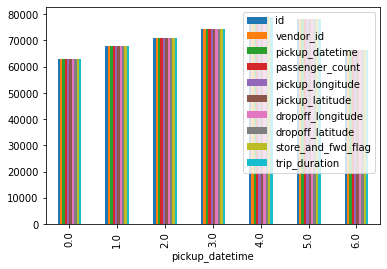

In [ ]:
g = df.groupby(df_train.pickup_datetime.dt.weekday).count().plot.bar()

In [ ]:
#CORRECT GRATH 1 !!!!!!!!!!!!!!!

In [ ]:
#LOOOK UP

In [ ]:
df = df_test.sort_values(by='trip_duration', ascending=True)
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
150056,id2229919,1,2016-06-13 07:04:28,1,-73.788353,40.641850,-73.788361,40.641853,N,2,1.098612
550574,id3422912,1,2016-06-23 21:19:57,1,-74.009949,40.711510,-74.009964,40.711498,N,2,1.098612
290686,id0655217,1,2016-06-16 07:08:10,1,-73.989349,40.690655,-73.989349,40.690655,N,2,1.098612
479635,id0362831,2,2016-06-30 22:32:19,1,-73.794487,40.657181,-73.794586,40.657276,N,2,1.098612
547818,id2055246,1,2016-06-07 20:06:59,1,-73.776550,40.646278,-73.776550,40.646282,N,2,1.098612


In [ ]:
import datetime


def create_features(data_frame):
    X = pd.concat([
      data_frame.pickup_datetime.apply(lambda x: x.timetuple().tm_yday),
      data_frame.pickup_datetime.apply(lambda x: x.hour),
      data_frame.trip_duration.apply(lambda x: int(x > 900000) )
     ], axis=1, keys=['day', 'hour', 'anomaly']
    )
  
    return X, data_frame.log_trip_duration
    
    
# your code here

In [ ]:
X_train, y_train = create_features(df_train)
X_train = X_train.sort_values(by='hour', ascending=False)
X_train.head()

,day,hour,anomaly
213103,71,23,0
114504,41,23,0
77144,41,23,0
140229,41,23,0
551221,41,23,0


In [ ]:
X_test, y_test = create_features(df_train)
X_test = X_test.sort_values(by='day', ascending=False)
X_test.head()

,day,hour,anomaly
210133,157,0,0
238399,157,0,0
485767,157,0,0
565364,157,0,0
396127,157,0,0


In [ ]:
%time new_X_train, new_y_train = create_features(df_train)

CPU times: user 6.05 s, sys: 110 ms, total: 6.16 s
Wall time: 7.17 s
